#Author- Jay Shah
#Date- 15-June

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models, transforms
from PIL import Image
import requests
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=0)
        self.conv2 = nn.Conv2d(96, 256, kernel_size=11, stride=1, padding=0)
        self.conv3 = nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=0)
        self.conv4 = nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=0)
        self.conv5 = nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=0)
        
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.batchnorm1 = nn.BatchNorm2d(96)
        self.batchnorm2 = nn.BatchNorm2d(256)
        self.batchnorm3 = nn.BatchNorm2d(384)
        self.batchnorm4 = nn.BatchNorm2d(384)
        self.batchnorm5 = nn.BatchNorm2d(256)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 5 * 5, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 17)
        
        self.dropout = nn.Dropout(0.4)
        self.batchnorm_fc1 = nn.BatchNorm1d(4096)
        self.batchnorm_fc2 = nn.BatchNorm1d(4096)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = self.batchnorm1(x)
        
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = self.batchnorm2(x)
        
        x = F.relu(self.conv3(x))
        x = self.batchnorm3(x)
        
        x = F.relu(self.conv4(x))
        x = self.batchnorm4(x)
        
        x = F.relu(self.conv5(x))
        x = self.pool(x)
        x = self.batchnorm5(x)
        
        x = self.flatten(x)
        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.batchnorm_fc1(x)
        
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.batchnorm_fc2(x)
        
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        
        return x

/Applications/anaconda3/envs/tensorflow_env/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Applications/anaconda3/envs/tensorflow_env/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


The predicted class is: orangutan


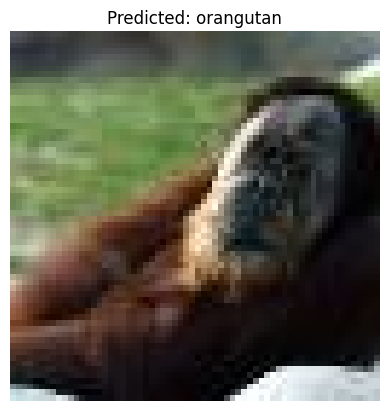

In [18]:
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import requests
import matplotlib.pyplot as plt

def classifyImage(img_path):
    alexnet = models.alexnet(pretrained=True)
    alexnet.eval()

    preprocess = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    img = Image.open(img_path).convert('RGB')
    img_tensor = preprocess(img).unsqueeze(0)  # Add batch dimension

    with torch.no_grad():
        outputs = alexnet(img_tensor)

    _, predicted = outputs.max(1)
    return predicted.item()
    
#labels from github
LABELS_URL = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
labels_response = requests.get(LABELS_URL)
class_labels = labels_response.text.split("\n")

#path of the image 
img_path = '/Users/jayshah/AlexNet-Architecture/tiny-imagenet-200/test/images/test_8.JPEG'  # Path to your local image
predicted_class_index = classifyImage(img_path)
predicted_class_name = class_labels[predicted_class_index]
print(f'The predicted class is: {predicted_class_name}')

#open the image 
img = Image.open(img_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_class_name}')
plt.axis('off')
plt.show()


The predicted class is: chain mail


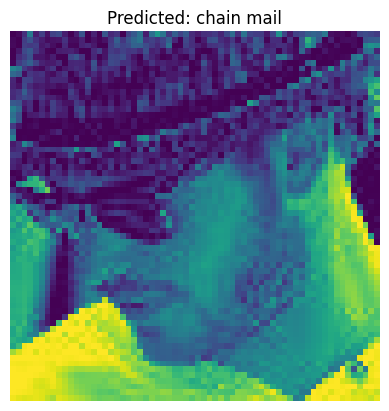

In [19]:
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import requests
import matplotlib.pyplot as plt

def classifyImage(img_path):
    alexnet = models.alexnet(pretrained=True)
    alexnet.eval()

    preprocess = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    img = Image.open(img_path).convert('RGB')
    img_tensor = preprocess(img).unsqueeze(0)  # Add batch dimension

    with torch.no_grad():
        outputs = alexnet(img_tensor)

    _, predicted = outputs.max(1)
    return predicted.item()
    
#labels from github
LABELS_URL = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
labels_response = requests.get(LABELS_URL)
class_labels = labels_response.text.split("\n")

#path of the image 
img_path = '/Users/jayshah/AlexNet-Architecture/tiny-imagenet-200/test/images/test_9.JPEG'  # Path to your local image
predicted_class_index = classifyImage(img_path)
predicted_class_name = class_labels[predicted_class_index]
print(f'The predicted class is: {predicted_class_name}')

#open the image 
img = Image.open(img_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_class_name}')
plt.axis('off')
plt.show()


The predicted class is: sidewinder


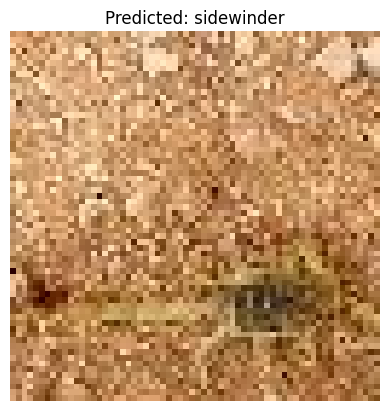

In [20]:
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import requests
import matplotlib.pyplot as plt

def classifyImage(img_path):
    alexnet = models.alexnet(pretrained=True)
    alexnet.eval()

    preprocess = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    img = Image.open(img_path).convert('RGB')
    img_tensor = preprocess(img).unsqueeze(0)  # Add batch dimension

    with torch.no_grad():
        outputs = alexnet(img_tensor)

    _, predicted = outputs.max(1)
    return predicted.item()
    
#labels from github
LABELS_URL = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
labels_response = requests.get(LABELS_URL)
class_labels = labels_response.text.split("\n")

#path of the image 
img_path = '/Users/jayshah/AlexNet-Architecture/tiny-imagenet-200/test/images/test_18.JPEG'  # Path to your local image
predicted_class_index = classifyImage(img_path)
predicted_class_name = class_labels[predicted_class_index]
print(f'The predicted class is: {predicted_class_name}')

#open the image 
img = Image.open(img_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_class_name}')
plt.axis('off')
plt.show()


The predicted class is: slide rule


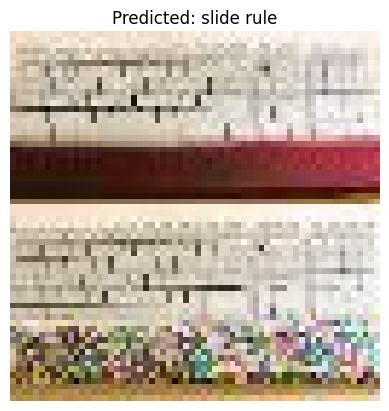

In [21]:
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import requests
import matplotlib.pyplot as plt

def classifyImage(img_path):
    alexnet = models.alexnet(pretrained=True)
    alexnet.eval()

    preprocess = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    img = Image.open(img_path).convert('RGB')
    img_tensor = preprocess(img).unsqueeze(0)  # Add batch dimension

    with torch.no_grad():
        outputs = alexnet(img_tensor)

    _, predicted = outputs.max(1)
    return predicted.item()
    
#labels from github
LABELS_URL = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
labels_response = requests.get(LABELS_URL)
class_labels = labels_response.text.split("\n")

#path of the image 
img_path = '/Users/jayshah/AlexNet-Architecture/tiny-imagenet-200/test/images/test_20.JPEG'  # Path to your local image
predicted_class_index = classifyImage(img_path)
predicted_class_name = class_labels[predicted_class_index]
print(f'The predicted class is: {predicted_class_name}')

#open the image 
img = Image.open(img_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_class_name}')
plt.axis('off')
plt.show()
